<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/viz_production_DoE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')
#import os
#for filename in os.listdir('/content/drive/MyDrive'):
#  print(filename)

Mounted at /content/drive


In [12]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from google.colab import data_table
from vega_datasets import data

# Load dataset
df = pd.read_csv('/content/full_imputed_final.csv',low_memory=False)
df.columns = df.columns.str.strip().str.lower()

# subset to some variables
subset_variables = ['cc_basic_2000', 'cc_undergrad_2015', 'rev_appropriations_fed', 'rev_appropriations_state', 'rev_grants_contracts_federal', 'rev_grants_contracts_state', 'exp_instruc_total', 'exp_research_total', 'exp_student_serv_total', 'exp_total_current', 'endowment_beg', 'exp_total','total_ft_undergrads','completers','prop.stem']  # List the variables you want to keep
filtered_columns = [col for col in df.columns if col in subset_variables]

#rename excellencia ratings and year
df = df.rename(columns={'excellencia_hsi_status_x': 'excellencia_hsi_status'})
df = df.rename(columns={'year_x': 'year'})

#create some new variables
df['revfedpc']=df['rev_appropriations_fed']/df['total_ft_undergrads']
df['revstatepc']=df['rev_appropriations_state']/df['total_ft_undergrads']
df['revgrantspc']=df['rev_grants_contracts_federal']/df['total_ft_undergrads']
df['revgrantsstatepc']=df['rev_grants_contracts_state']/df['total_ft_undergrads']
df['expinstpc']=df['exp_instruc_total']/df['total_ft_undergrads']
df['expresearchpc']=df['exp_research_total']/df['total_ft_undergrads']
df['expstudentservpc']=df['exp_student_serv_total']/df['total_ft_undergrads']
df['exptotalcurpc']=df['exp_total_current']/df['total_ft_undergrads']
df['endowmentpc']=df['endowment_beg']/df['total_ft_undergrads']
df['exptotalpc']=df['exp_total']/df['total_ft_undergrads']

#eligibility codes
#df['DoEhsi'] = np.where(df['hsi_code'].isin([5, 6]), 'HSI',np.where(df['hsi_code'] == 4, 'Emerging HSI', 'Non-HSI'))
#print(df[['hsi_code', 'DoEhsi']].value_counts())

compute_vars=['DoEhsi','revfedpc','revstatepc','revgrantspc','revgrantsstatepc','expinstpc','expresearchpc','expstudentservpc','exptotalpc','endowmentpc','exptotalpc']
subset_variables.extend(compute_vars)
#print(df[subset_variables].head())
#pull out relevant sectors
excluded_sectors = ['Private for-profit less-than-two-year','Private for-profit two-year', 'Private for-profit four-year or above', 'Public less-than two-year', 'Public less-than two-year', 'Administrative unit', 'Sector unknown (not active)']
df2 = df[~df['sector'].isin(excluded_sectors)]
print(df2['sector'].value_counts())
df2 = df2[~df2['year_y'].isin([2021, 2022])]
df2 = df2.rename(columns={'year_x': 'year'})

print(df2['rev_appropriations_fed'].describe())
print(df2['doe'].value_counts())




sector
Private not-for-profit four-year or above    6939
Public two-year                              6202
Public four-year or above                    4295
Private not-for-profit less-than-two-year     276
Private not-for-profit two-year               251
Name: count, dtype: int64
count    3.600000e+02
mean     7.481037e+07
std      1.948944e+08
min      1.539500e+04
25%      2.969110e+05
50%      1.224749e+06
75%      1.396085e+07
max      7.681461e+08
Name: rev_appropriations_fed, dtype: float64
doe
Non-HSI         1373
HSI              477
Emerging HSI      98
Name: count, dtype: int64


In [13]:
summary_stats = df2.groupby('doe', dropna=True)['prop.stem'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

              min       max      mean
doe                                  
Emerging HSI  0.0  0.220339  0.098966
HSI           0.0  0.385027  0.121360
Non-HSI       0.0  0.833333  0.129315


In [14]:
import pandas as pd

summary_stats = df2.groupby('doe', dropna=True)['rev_appropriations_fed'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                    min          max          mean
doe                                               
Emerging HSI        NaN          NaN           NaN
HSI           1224749.0    3277286.0  2.251018e+06
Non-HSI         15395.0  229844000.0  2.912562e+07


In [15]:
import pandas as pd

summary_stats = df2.groupby('doe', dropna=True)['exptotalcurpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                      min           max          mean
doe                                                  
Emerging HSI  1476.137318  9.438514e+04   8445.325738
HSI           1511.053335  7.445955e+04   7366.025609
Non-HSI       1102.286918  1.709542e+06  27768.856513


In [16]:
import pandas as pd


summary_stats = df2.groupby('doe', dropna=True)['exptotalpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                    min           max        mean
doe                                              
Emerging HSI  13.984630   1597.038391  136.886819
HSI           14.163801   2011.731214  116.438271
Non-HSI       11.066415  19331.636364  409.659522


In [17]:
import pandas as pd


summary_stats = df.groupby('doe', dropna=True)['revgrantspc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                    min            max         mean
doe                                                
Emerging HSI  13.148184    5063.267813   638.623675
HSI            0.922282    3475.063288   744.779846
Non-HSI        0.699301  151344.792720  2331.574852


In [18]:
import pandas as pd


summary_stats = df2.groupby('doe', dropna=True)['revgrantsstatepc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                    min           max        mean
doe                                              
Emerging HSI  63.529714    652.386363  401.660671
HSI            0.487738   2887.509780  443.522743
Non-HSI        0.151773  22079.285714  561.658387


In [19]:
import pandas as pd


summary_stats = df2.groupby('doe', dropna=True)['endowmentpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                    min           max          mean
doe                                                
Emerging HSI  28.518898  1.098495e+05   8081.209828
HSI           12.906479  3.973921e+04   3083.850437
Non-HSI        1.039698  2.066563e+06  34434.214420


In [20]:
import pandas as pd

#
summary_stats = df2.groupby('doe', dropna=True)['expinstpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                     min            max         mean
doe                                                 
Emerging HSI  508.799401   44007.063882  3319.438693
HSI           596.564562   26805.433526  2462.230315
Non-HSI       283.768752  118483.179980  6625.159900


In [21]:
import pandas as pd

#
summary_stats = df2.groupby('doe', dropna=True)['expresearchpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                   min            max         mean
doe                                               
Emerging HSI  0.568862    7460.073710  1500.872668
HSI           6.179334    4369.106286   427.163936
Non-HSI       0.533792  129673.311426  4252.833726


In [22]:
import pandas as pd


summary_stats = df2.groupby('doe', dropna=True)['expstudentservpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                     min           max         mean
doe                                                
Emerging HSI  167.235280   3484.380882   734.242827
HSI           138.214211   6320.953757  1035.651756
Non-HSI        49.201709  27789.521640  1874.063524


In [23]:
import pandas as pd

summary_stats = df2.groupby('doe', dropna=True)['student_faculty_ratio'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

              min   max       mean
doe                               
Emerging HSI  2.0  36.0  21.106383
HSI           2.0  36.0  21.938689
Non-HSI       1.0  38.0  15.320325


In [24]:
import pandas as pd

# Calculate the mode (most frequent value) instead of the mean for 'open_admissions_policy'
summary_stats = df2.groupby('doe', dropna=True)['open_admissions_policy'].value_counts(normalize=True)


# Display the table
print(summary_stats)

doe           open_admissions_policy
Emerging HSI  Yes                       0.795918
              No                        0.163265
              Not applicable            0.040816
HSI           Yes                       0.693920
              No                        0.289308
              Not applicable            0.016771
Non-HSI       No                        0.493440
              Yes                       0.370991
              Not applicable            0.135569
Name: proportion, dtype: float64


(1947, 3)


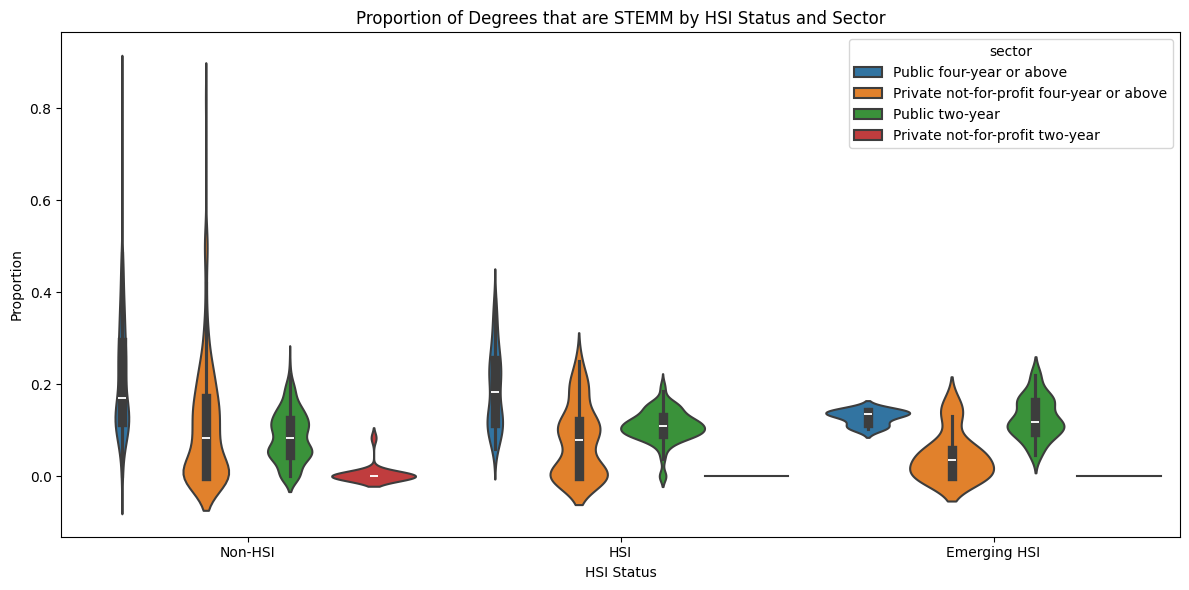

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


temp_df = df2[['doe', 'prop.stem', 'sector']].dropna()
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.color_palette("rocket")
sns.violinplot(
    data=temp_df,
    x='doe',
    y='prop.stem',  # Use log-transformed values for better visualization
    hue='sector',
    #palette={'Public': '#E41A1C', 'Private not-for-profit': '#4DAF4A', 'Private for-profit': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    #legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Proportion of Degrees that are STEMM by HSI Status and Sector')
plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1947, 2)


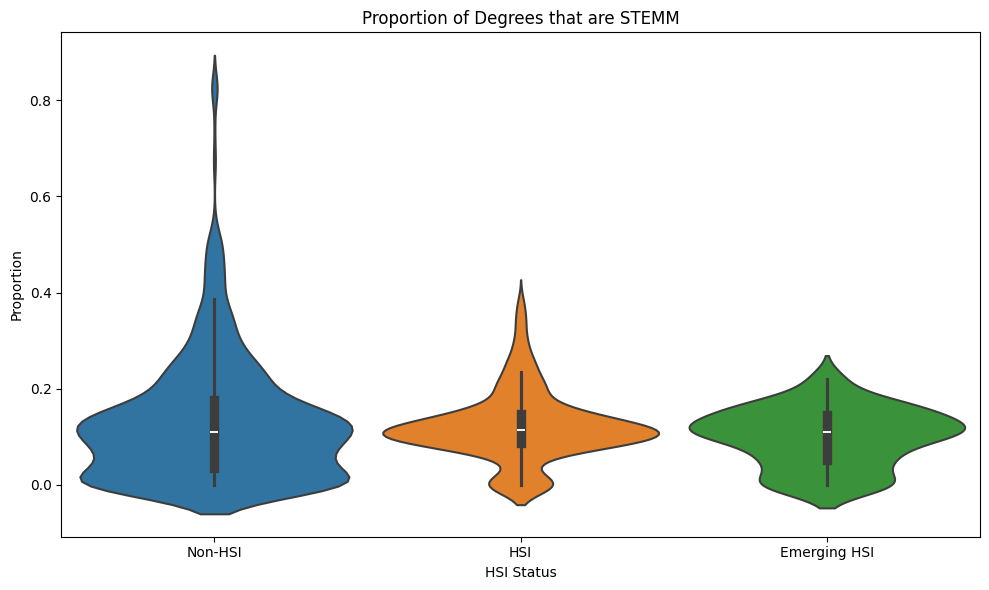

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


temp_df = df2[['doe', 'prop.stem']].dropna()
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='prop.stem',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Proportion of Degrees that are STEMM')
plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()


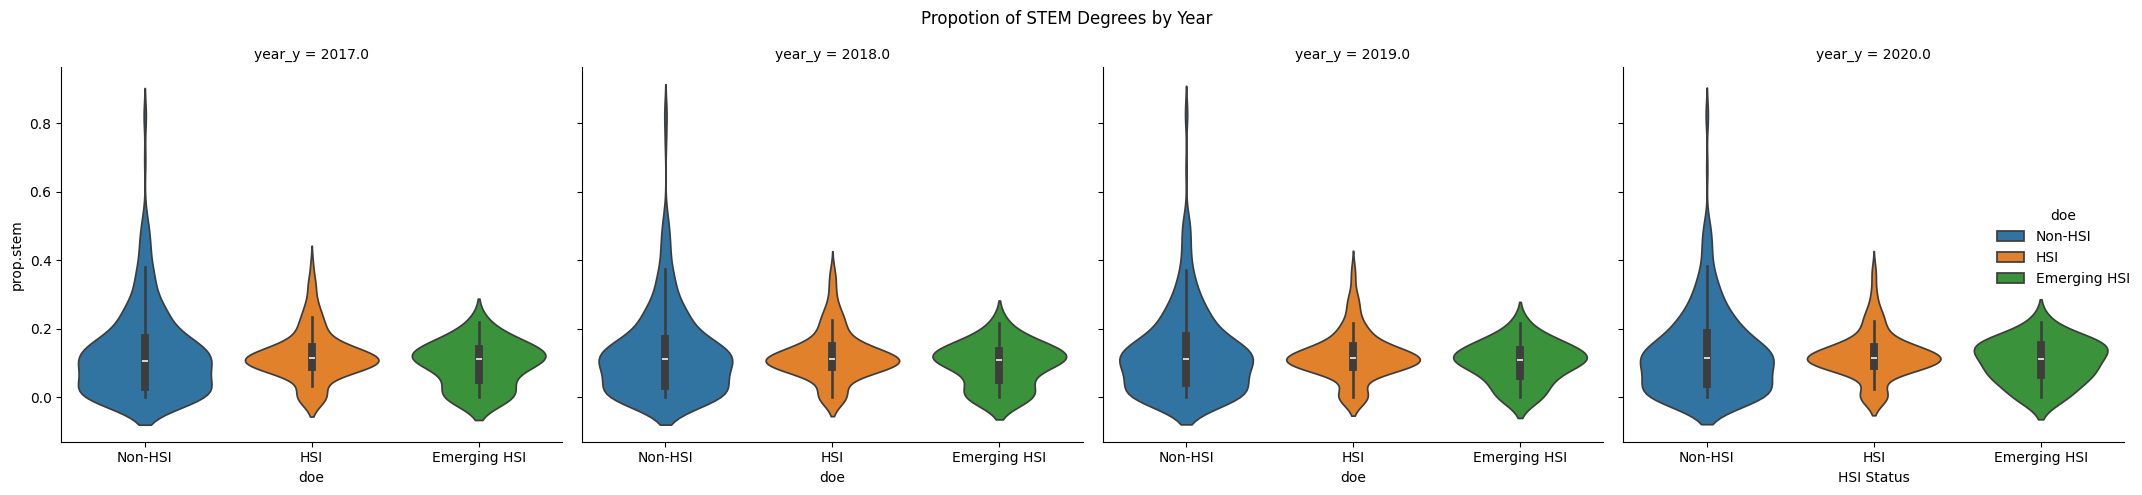

In [28]:
g=sns.catplot(data=df2, x="doe", y="prop.stem", col="year_y",hue="doe", kind="violin")

plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add a title to the entire figure
g.fig.suptitle("Propotion of STEM Degrees by Year")

# Adjust the position of the title (optional)
g.fig.subplots_adjust(top=0.85)
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(56, 3)


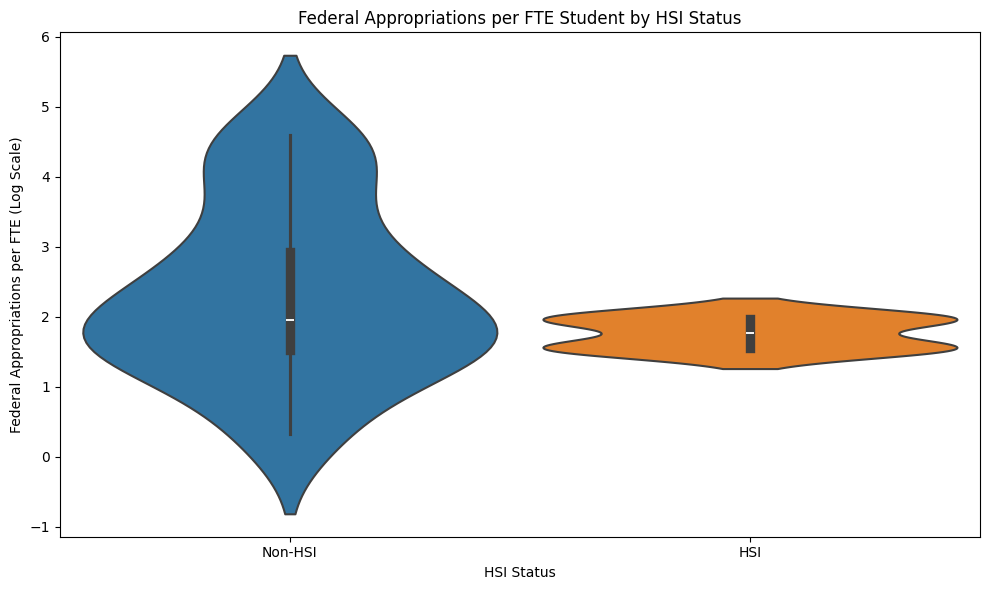

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df2['logrevfedpc'] = np.log10(df2['revfedpc'])
temp_df = df2[['doe', 'revfedpc','logrevfedpc']].dropna()

#temp_df = temp_df[temp_df['revfedpc'] < 300]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logrevfedpc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Federal Appropriations per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Federal Appropriations per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

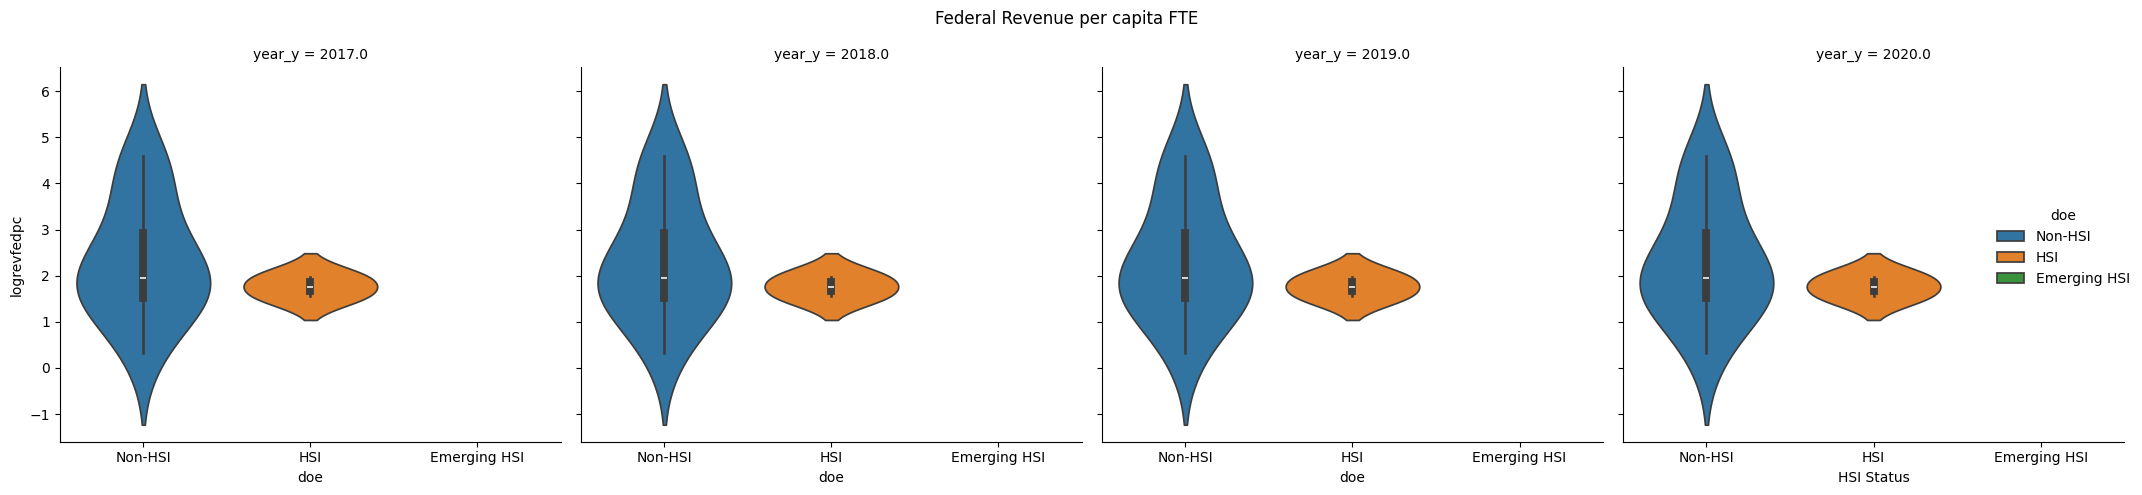

In [30]:
g=sns.catplot(data=df2, x="doe", y="logrevfedpc", col="year_y",hue="doe", kind="violin")

plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add a title to the entire figure
g.fig.suptitle("Federal Revenue per capita FTE")

# Adjust the position of the title (optional)
g.fig.subplots_adjust(top=0.85)
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1778, 3)


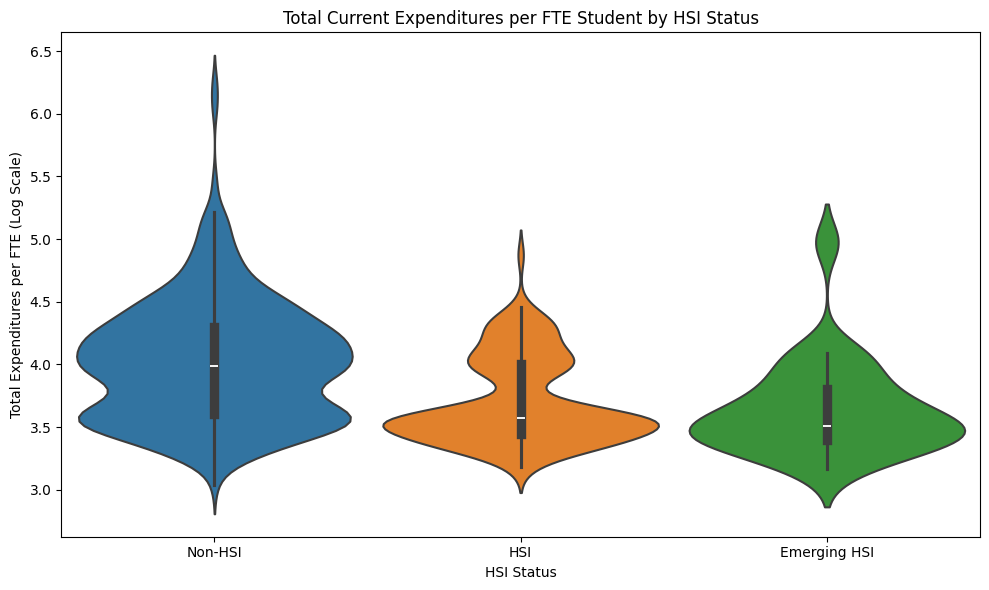

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexptotalcurpc']=np.log10(df2['exptotalcurpc'])
temp_df = df2[['doe', 'exptotalcurpc','logexptotalcurpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logexptotalcurpc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Current Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1614, 3)


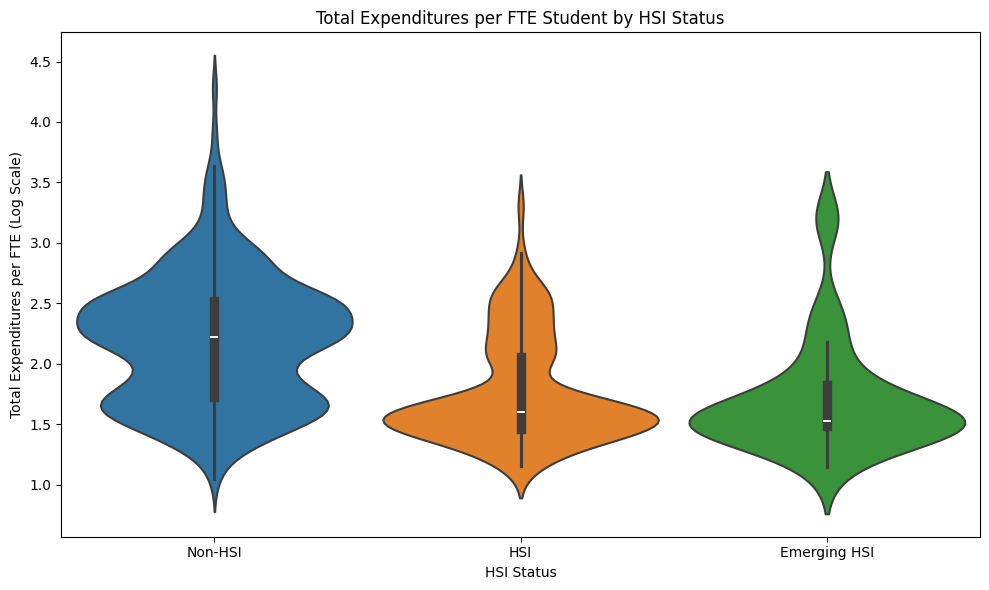

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexptotalpc']=np.log10(df2['exptotalpc'])
temp_df = df2[['doe', 'exptotalpc','logexptotalpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logexptotalpc',  # Use log-transformed values for better visualization
    hue='doe',
   # palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

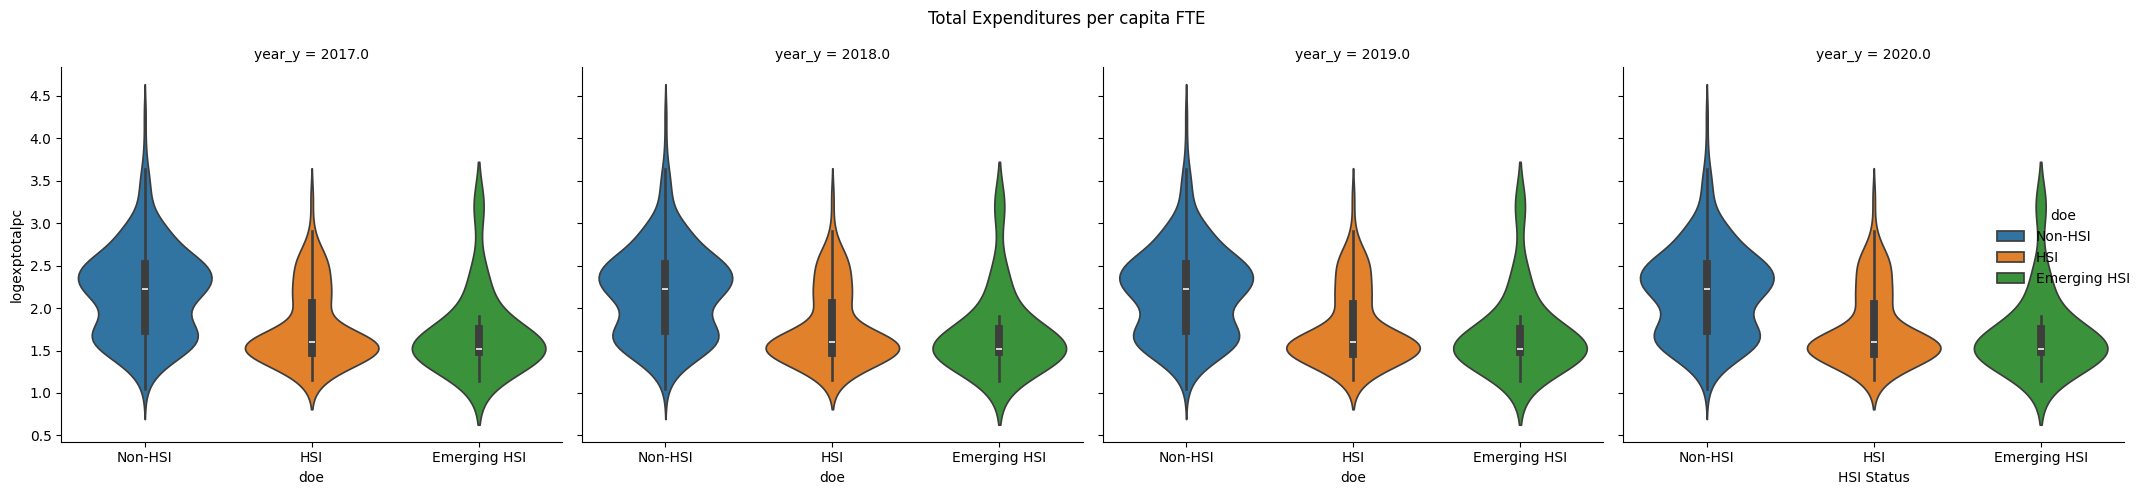

In [33]:
g=sns.catplot(data=df2, x="doe", y="logexptotalpc", col="year_y",hue="doe", kind="violin")

plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add a title to the entire figure
g.fig.suptitle("Total Expenditures per capita FTE")

# Adjust the position of the title (optional)
g.fig.subplots_adjust(top=0.85)
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1627, 3)


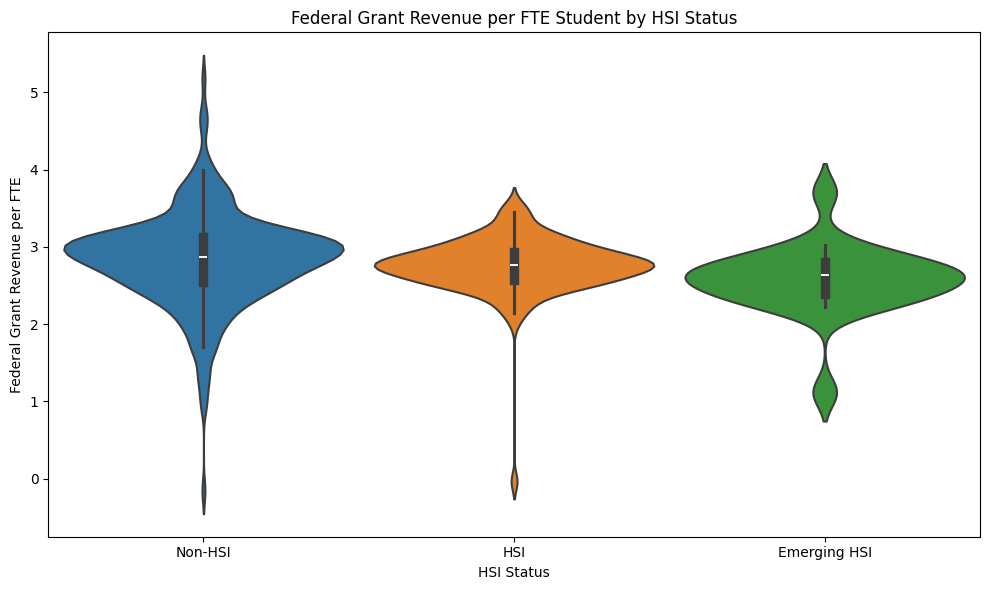

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logrevgrantspc']=np.log10(df2['revgrantspc'])
temp_df = df2[['doe', 'revgrantspc','logrevgrantspc']].dropna()
#temp_df = temp_df[temp_df['revgrantspc'] < 20000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logrevgrantspc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Federal Grant Revenue per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Federal Grant Revenue per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1342, 2)


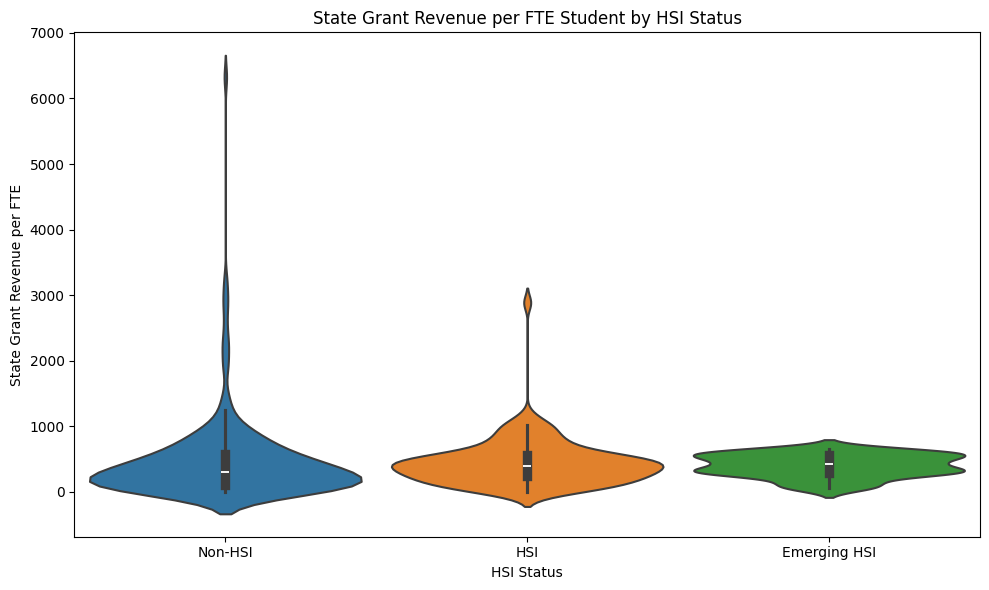

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df2[['doe', 'revgrantsstatepc']].dropna()
temp_df = temp_df[temp_df['revgrantsstatepc'] < 10000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='revgrantsstatepc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('State Grant Revenue per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('State Grant Revenue per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1365, 2)


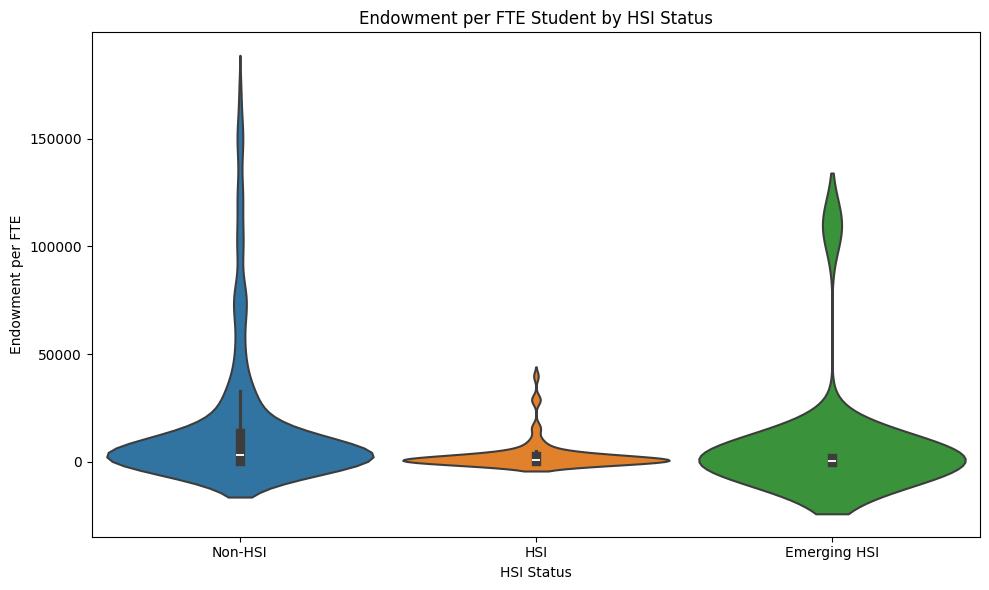

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df2[['doe', 'endowmentpc']].dropna()
temp_df = temp_df[temp_df['endowmentpc'] < 200000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='endowmentpc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Endowment per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Endowment per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1778, 3)


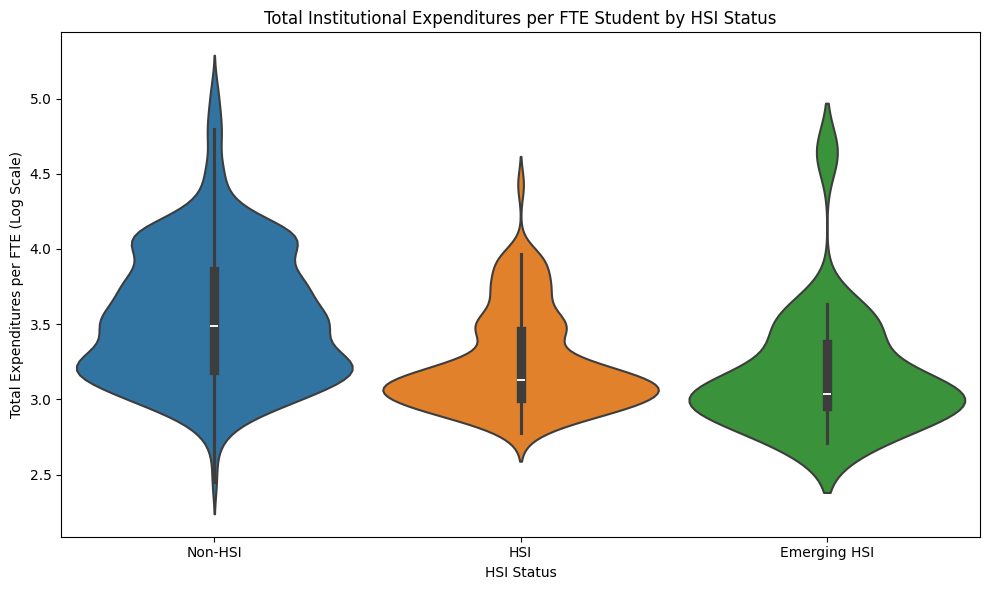

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexpinstpc']=np.log10(df2['expinstpc'])
temp_df = df2[['doe', 'expinstpc','logexpinstpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logexpinstpc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Institutional Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(650, 3)


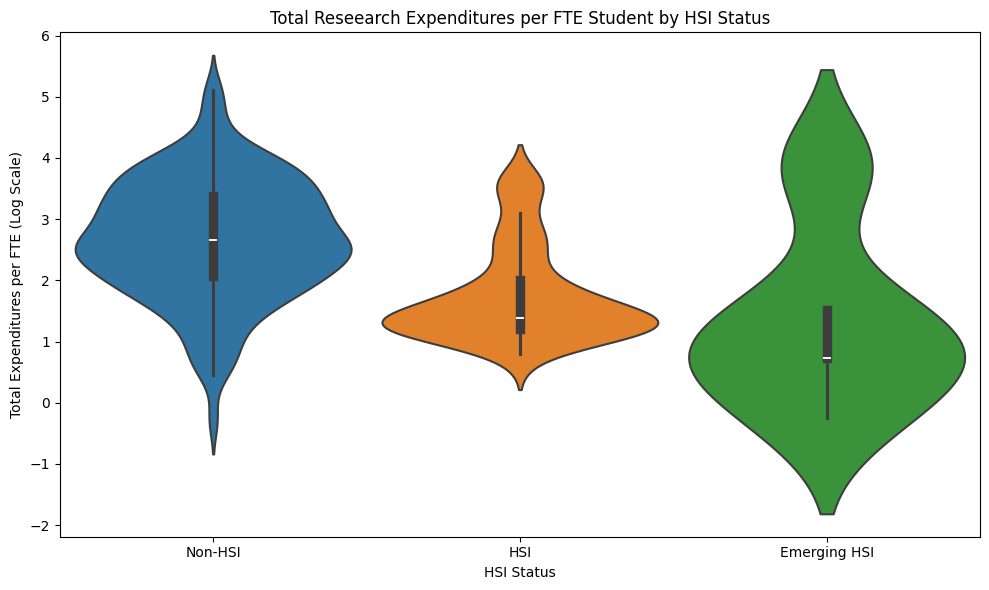

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexpresearchpc']=np.log10(df2['expresearchpc'])
temp_df = df2[['doe', 'expresearchpc','logexpresearchpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logexpresearchpc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Reseearch Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1774, 3)


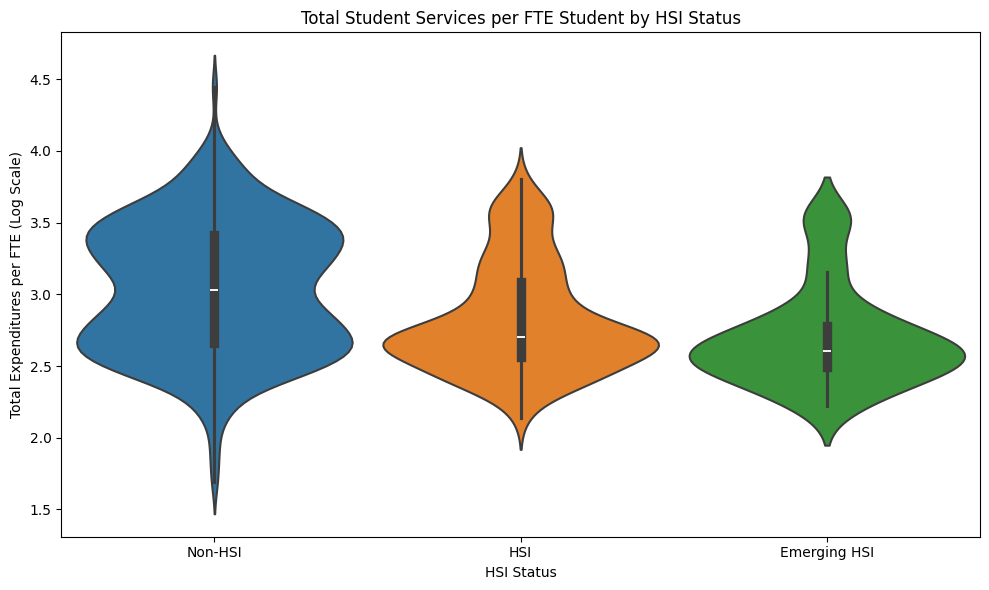

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logexpstudentservpc']=np.log10(df2['expstudentservpc'])
temp_df = df2[['doe', 'expstudentservpc','logexpstudentservpc']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='logexpstudentservpc',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Student Services per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

(1797, 3)


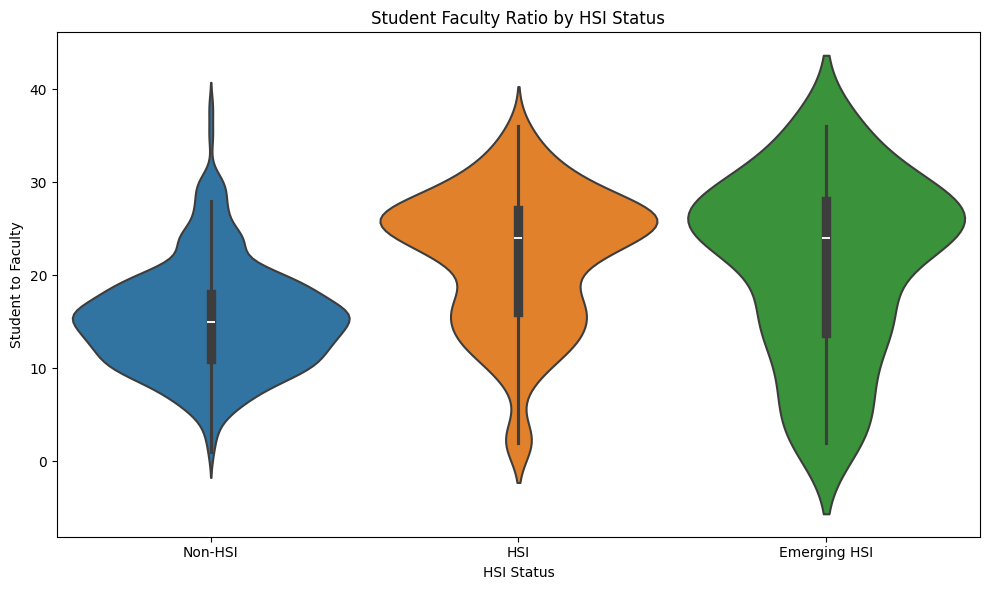

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2['logstudent_faculty_ratio']=np.log10(df2['student_faculty_ratio'])
temp_df = df2[['doe', 'student_faculty_ratio','logstudent_faculty_ratio']].dropna()
#temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='doe',
    y='student_faculty_ratio',  # Use log-transformed values for better visualization
    hue='doe',
    #palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Student Faculty Ratio by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Student to Faculty')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

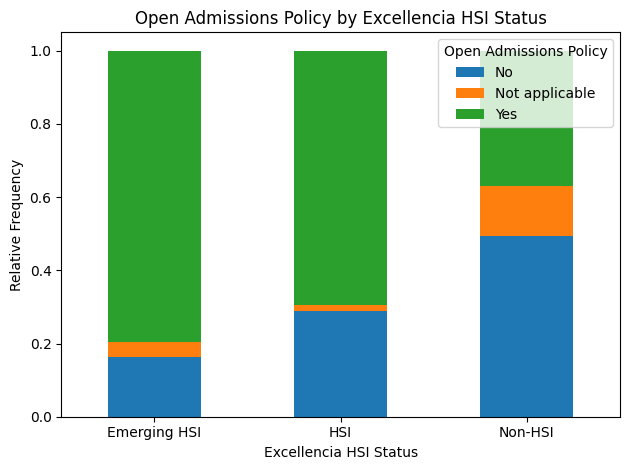

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate relative frequencies
relative_freq = df2.groupby('doe')['open_admissions_policy'].value_counts(normalize=True).unstack()

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
relative_freq.plot(kind='bar', stacked=True)  # Create stacked bar plot

# Customize plot
plt.title('Open Admissions Policy by Excellencia HSI Status')
plt.xlabel('Excellencia HSI Status')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Open Admissions Policy')

plt.tight_layout()
plt.show()